In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Termin tabela przestawna pojawia się w języku angielskim pod kilkoma nazwami, np. PivotTable (nazwa zastrzeżona przez firmę Microsoft), contingency table, cross table. Jest to znana funkcjonalność programu Excel. Pandas pozwala na użycie tego w sposób, który jest szybki i łatwy do połączenia z innymi częściami kodu (np. jako część modelowania predykcyjnego). 

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/adult_train.csv', sep=';')

In [44]:
df

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [55]:
df['Target'] = df['Target'].map({' <=50K': 0, ' >50K': 1})

In [54]:
pd.concat([pd.get_dummies(df['Race']), df], axis=1).drop('Race', axis=1)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,0,0,0,0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,0,0,0,0,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,0,0,0,0,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,0,0,1,0,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,0,0,1,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,0,0,0,0,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,0,0,0,0,1,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,0,0,0,0,1,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


## 1. Tworzenie tabeli przestawnej poprzez groupby

In [56]:
df.groupby(['Sex', 'Race'])

In [58]:
df.groupby(['Sex', 'Race'])['Race'].count().index

MultiIndex([(' Female', ' Amer-Indian-Eskimo'),
            (' Female', ' Asian-Pac-Islander'),
            (' Female',              ' Black'),
            (' Female',              ' Other'),
            (' Female',              ' White'),
            (  ' Male', ' Amer-Indian-Eskimo'),
            (  ' Male', ' Asian-Pac-Islander'),
            (  ' Male',              ' Black'),
            (  ' Male',              ' Other'),
            (  ' Male',              ' White')],
           names=['Sex', 'Race'])

In [6]:
df.groupby(['Sex', 'Race'])['Race'].count().unstack()

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


## 2. Tworzenie tabeli przestawnej poprzez crosstab

In [7]:
pd.crosstab(df['Sex'], df['Race'])

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


Możemy zliczać po rzędach lub kolumnach używając argumentu margins

In [8]:
pd.crosstab(df['Sex'], df['Race'], margins=True, margins_name="Total")

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Total
Sex,,,,,,
Female,119,346,1555,109,8642,10771
Male,192,693,1569,162,19174,21790
Total,311,1039,3124,271,27816,32561


Możemy też zdefiniować kolumnę, po której będziemy liczyć statystyki, np. wiek

In [9]:
pd.crosstab(df['Sex'], df['Race'], values=df['Age'], aggfunc='mean', margins=True).round(2)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Sex,,,,,,
Female,37.12,35.09,37.85,31.68,36.81,36.86
Male,37.21,39.07,37.68,34.65,39.65,39.43
All,37.17,37.75,37.77,33.46,38.77,38.58


Kolejną opcją jest liczenie proporcji każdej podgrupy w kontekście danej kolumny, rzędu lub całości. Możemy to osiągnąć poprzez argument normalize

Proporcja w kontekście całego zbioru danych:

In [60]:
pd.crosstab(df['Sex'], df['Race'], normalize='all', margins=True)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Sex,,,,,,
Female,0.003655,0.010626,0.047757,0.003348,0.265410,0.330795
Male,0.005897,0.021283,0.048186,0.004975,0.588864,0.669205
All,0.009551,0.031909,0.095943,0.008323,0.854274,1.000000


Proporcja w odniesieniu do płci (rzędów):

In [11]:
pd.crosstab(df['Sex'], df['Race'], normalize='index', margins=True)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Sex,,,,,
Female,0.011048,0.032123,0.144369,0.010120,0.802340
Male,0.008811,0.031804,0.072006,0.007435,0.879945
All,0.009551,0.031909,0.095943,0.008323,0.854274


Proporcja w odniesieniu do ras (kolumn):

In [12]:
pd.crosstab(df['Sex'], df['Race'], normalize='columns', margins=True)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Sex,,,,,,
Female,0.382637,0.333013,0.497759,0.402214,0.310684,0.330795
Male,0.617363,0.666987,0.502241,0.597786,0.689316,0.669205


## Tabela przestawna dla więcej niż jednej kategorii

In [13]:
pd.set_option('display.max_rows', 500)
out = pd.crosstab([df['Education'], df['Race']], df['Target'], normalize='index', margins=True)

In [14]:
out

Target                                    0         1
Education     Race                                   
 10th          Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  0.923077  0.076923
               Black               0.954887  0.045113
               Other               0.888889  0.111111
               White               0.929134  0.070866
 11th          Amer-Indian-Eskimo  0.857143  0.142857
               Asian-Pac-Islander  0.952381  0.047619
               Black               0.954248  0.045752
               Other               1.000000  0.000000
               White               0.948823  0.051177
 12th          Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  0.888889  0.111111
               Black               0.928571  0.071429
               Other               1.000000  0.000000
               White               0.919403  0.080597
 1st-4th       Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  1.000000  0.000000
               Black               0.937500  0.062500
               Other               1.000000  0.000000
               White               0.962687  0.037313
 5th-6th       Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  0.833333  0.166667
               Black               1.000000  0.000000
               Other               0.923077  0.076923
               White               0.956989  0.043011
 7th-8th       Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  1.000000  0.000000
               Black               0.964286  0.035714
               Other               1.000000  0.000000
               White               0.931284  0.068716
 9th           Amer-Indian-Eskimo  1.000000  0.000000
               Asian-Pac-Islander  0.888889  0.111111
               Black               0.955056  0.044944
               Other               1.000000  0.000000
               White               0.945409  0.054591
 Assoc-acdm    Amer-Indian-Eskimo  0.875000  0.125000
               Asian-Pac-Islander  0.724138  0.275862
               Black               0.822430  0.177570
               Other               0.750000  0.250000
               White               0.743169  0.256831
 Assoc-voc     Amer-Indian-Eskimo  0.947368  0.052632
               Asian-Pac-Islander  0.763158  0.236842
               Black               0.839286  0.160714
               Other               1.000000  0.000000
               White               0.724109  0.275891
 Bachelors     Amer-Indian-Eskimo  0.619048  0.380952
               Asian-Pac-Islander  0.664360  0.335640
               Black               0.709091  0.290909
               Other               0.848485  0.151515
               White               0.569628  0.430372
 Doctorate     Amer-Indian-Eskimo  0.333333  0.666667
               Asian-Pac-Islander  0.357143  0.642857
               Black               0.181818  0.818182
               Other               0.500000  0.500000
               White               0.252033  0.747967
 HS-grad       Amer-Indian-Eskimo  0.907563  0.092437
               Asian-Pac-Islander  0.849558  0.150442
               Black               0.926746  0.073254
               Other               0.974359  0.025641
               White               0.826819  0.173181
 Masters       Amer-Indian-Eskimo  0.400000  0.600000
               Asian-Pac-Islander  0.511364  0.488636
               Black               0.534884  0.465116
               Other               0.714286  0.285714
               White               0.433312  0.566688
 Preschool     Asian-Pac-Islander  1.000000  0.000000
               Black               1.000000  0.000000
               Other               1.000000  0.000000
               White               1.000000  0.000000
 Prof-school   Amer-Indian-Eskimo  0.000000  1.000000
               Asian-Pac-Islander  0.341463  0.658537
               Black               0.466667  0.533333
    

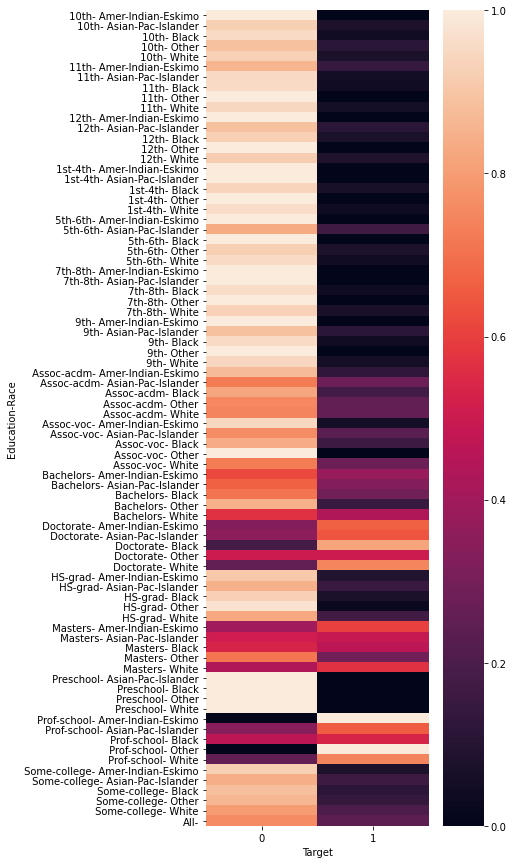

In [15]:
plt.figure(figsize=(5,15))
sns.heatmap(out);

In [16]:
pd.crosstab(df['Target'], df['Race'], normalize='columns')

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Target,,,,,
0,0.884244,0.73436,0.87612,0.907749,0.74414
1,0.115756,0.26564,0.12388,0.092251,0.25586


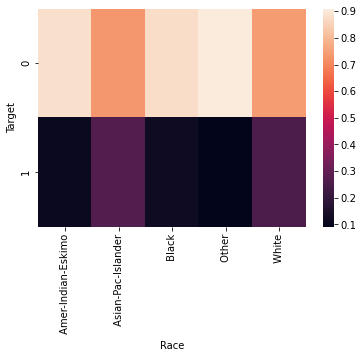

In [17]:
sns.heatmap(pd.crosstab(df['Target'], df['Race'], normalize='columns'));

In [82]:
df['is_working_much'] = df['Hours_per_week'] > 40
df['is_working_much'] = df['is_working_much'].astype('int')
pd.crosstab([df['Race'],df['Sex']], [df['is_working_much'],df['Target']], normalize='index')

is_working_much                     0                   1          
Target                              0         1         0         1
Race                Sex                                            
 Amer-Indian-Eskimo  Female  0.789916  0.058824  0.109244  0.042017
                     Male    0.651042  0.072917  0.223958  0.052083
 Asian-Pac-Islander  Female  0.736994  0.101156  0.138728  0.023121
                     Male    0.536797  0.203463  0.126984  0.132756
 Black               Female  0.861093  0.041801  0.081029  0.016077
                     Male    0.681326  0.121096  0.129382  0.068196
 Other               Female  0.853211  0.027523  0.091743  0.027523
                     Male    0.691358  0.061728  0.191358  0.055556
 White               Female  0.745082  0.080884  0.135964  0.038070
                     Male    0.474445  0.147126  0.207990  0.170439

## 3. Tworzenie tabeli przestawnych poprzez pivot_table

Operacje są bardzo podobne, co w przypadku crosstab, ale crosstab jest trochę przyjemniejszy w zapisie:

In [62]:
pd.crosstab(df['Sex'], df['Race'])

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [68]:
pd.pivot_table(df, index=['Sex'], columns=['Race'], values=['Workclass'], aggfunc=['count'])

count                                         
                  Workclass                                         
Race     Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
Sex                                                                 
 Female                 107                 313   1431     93   7988
 Male                   179                 661   1480    155  18318

## Test chi-kwadrat

In [88]:
vec = bernoulli.rvs(0.49, size = 1000)

In [89]:
freq = [1000-vec.sum(), vec.sum()]

In [90]:
chisquare(freq)

Power_divergenceResult(statistic=0.036, pvalue=0.8495154923650348)

In [73]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import bernoulli

In [20]:
df[df['Hours_per_week'] > 40].shape[0]

9581

In [21]:
df['Target'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: Target, dtype: float64

In [22]:
pd.crosstab(df['Target'], df['is_working_much'], normalize='columns')

is_working_much,0,1
Target,,
0,0.826588,0.597537
1,0.173412,0.402463


In [83]:
obs = pd.crosstab(df['Target'], df['is_working_much'])

In [91]:
obs

is_working_much,0,1
Target,,
0,18995,5725
1,3985,3856


In [84]:
chi2_contingency(obs)

(1939.2092860579232,
 0.0,
 1,
 array([[17446.19636989,  7273.80363011],
        [ 5533.80363011,  2307.19636989]]))

In [92]:
cat = df.nunique() < 20

In [93]:
cat_names = cat[cat==True].index

In [27]:
for column in cat_names:
    if column != 'Traget':
        crosstab = pd.crosstab(df['Target'], df[column])
        print(chi2_contingency(crosstab)[1], chi2_contingency(crosstab)[1]>=0.05)

1.9338476684848218e-174 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
2.305960610160958e-70 False
0.0 False
0.0 False
0.0 False


In [96]:
r = bernoulli.rvs(0.24, size=df.shape[0])

In [101]:
crosstab_random = pd.crosstab(df['Target'], r)

In [102]:
crosstab_random

col_0,0,1
Target,,
0,18778,5942
1,5934,1907


In [103]:
chi2_contingency(crosstab_random)

(0.2465389196843794,
 0.6195227436690705,
 1,
 array([[18761.11421639,  5958.88578361],
        [ 5950.88578361,  1890.11421639]]))